In [2]:
# Base libraries
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_ta as ta

# Plotting
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('fivethirtyeight')

# Ignore warnings
import warnings 
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 1000)

# Set seed
np.random.seed(2023)

In [3]:
# Read components of down from Yahoo Finance
dow = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')


In [4]:
# Retrieve components table
dow[1]

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,2.41%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,3.02%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,5.48%
3,Apple,NASDAQ,AAPL,Information technology,2015-03-19,NaN,2.84%
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,NaN,3.36%
5,Caterpillar,NYSE,CAT,Construction and mining,1991-05-06,NaN,4.52%
6,Chevron,NYSE,CVX,Petroleum industry,2008-02-19,Also 1930-07-18 to 1999-11-01,3.50%
7,Cisco,NASDAQ,CSCO,Information technology,2009-06-08,NaN,0.96%
8,Coca-Cola,NYSE,KO,Drink industry,1987-03-12,Also 1932-05-26 to 1935-11-20,1.22%
9,Disney,NYSE,DIS,Broadcasting and entertainment,1991-05-06,NaN,1.89%


In [5]:
# Retrieve stock symbol
dow_stocks = list(dow[1]['Symbol'])
dow_company_name = list(dow[1]['Company'])
dow_stocks[:5]

['MMM', 'AXP', 'AMGN', 'AAPL', 'BA']

In [6]:
# Use comprehension to fetch data for multiple fields
dow_ohlc = {symbol: yf.download(symbol, 
                                  start='2010-01-01', end='2023-05-31', 
                                  auto_adjust=False, progress=False) for symbol in dow_stocks}

# Save dow_ohlc dict for future use
np.save('data/dow_ohlc.npy', dow_ohlc)

In [7]:
# Load dow_ohlc dict
ohlc = np.load('data/dow_ohlc.npy', allow_pickle='TRUE').item()
ohlc['MMM'].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,83.089996,83.449997,82.669998,83.019997,55.033218,3043700
2010-01-05,82.800003,83.230003,81.699997,82.500000,54.688515,2847000
2010-01-06,83.879997,84.599998,83.510002,83.669998,55.464088,5268500
2010-01-07,83.320000,83.760002,82.120003,83.730003,55.503880,4470100
2010-01-08,83.690002,84.320000,83.300003,84.320000,55.894997,3405800


In [8]:
for symbol in dow_stocks:
    high = ohlc[symbol]['High']
    low = ohlc[symbol]['Low']
    close = ohlc[symbol]['Close']
    ohlc[symbol]['ATR'] = ta.atr(high, low, close)

In [9]:
# Store stock price in a Data Frame
stock_price = pd.DataFrame({symbol: ohlc[symbol]['Close'] for symbol in dow_stocks})
stock_ret = stock_price.resample('W-FRI').last().pct_change()

# Check for missing values
stock_ret.isnull().sum()

MMM       1
AXP       1
AMGN      1
AAPL      1
BA        1
CAT       1
CVX       1
CSCO      1
KO        1
DIS       1
DOW     481
GS        1
HD        1
HON       1
IBM       1
INTC      1
JNJ       1
JPM       1
MCD       1
MRK       1
MSFT      1
NKE       1
PG        1
CRM       1
TRV       1
UNH       1
VZ        1
V         1
WBA       1
WMT       1
dtype: int64

In [10]:
# Get the index of the NaN values
[stock_ret[x].index[stock_ret[x].apply(np.isnan)] for x in dow_stocks]

[DatetimeIndex(['2010-01-08'], dtype='datetime64[ns]', name='Date', freq='W-FRI'),
 DatetimeIndex(['2010-01-08'], dtype='datetime64[ns]', name='Date', freq='W-FRI'),
 DatetimeIndex(['2010-01-08'], dtype='datetime64[ns]', name='Date', freq='W-FRI'),
 DatetimeIndex(['2010-01-08'], dtype='datetime64[ns]', name='Date', freq='W-FRI'),
 DatetimeIndex(['2010-01-08'], dtype='datetime64[ns]', name='Date', freq='W-FRI'),
 DatetimeIndex(['2010-01-08'], dtype='datetime64[ns]', name='Date', freq='W-FRI'),
 DatetimeIndex(['2010-01-08'], dtype='datetime64[ns]', name='Date', freq='W-FRI'),
 DatetimeIndex(['2010-01-08'], dtype='datetime64[ns]', name='Date', freq='W-FRI'),
 DatetimeIndex(['2010-01-08'], dtype='datetime64[ns]', name='Date', freq='W-FRI'),
 DatetimeIndex(['2010-01-08'], dtype='datetime64[ns]', name='Date', freq='W-FRI'),
 DatetimeIndex(['2010-01-08', '2010-01-15', '2010-01-22', '2010-01-29', '2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26', '2010-03-05', '2010-03-12',
              

In [11]:
# Fill forward the missing values and drop DOW from the list
stock_ret.fillna(method='ffill', axis=0, inplace=True)
stock_ret.drop(['DOW'], axis=1, inplace=True)
stock_ret.dropna(inplace=True)


In [12]:
# Verify Data Frame shape
stock_ret.shape

(699, 29)

In [13]:
# Verify wheter the missing values are dropped
np.isnan(stock_ret.any()).sum()

0

In [14]:
# Transpose
weekly_ret = stock_ret.T

# Check output
weekly_ret

Date,2010-01-15,2010-01-22,2010-01-29,2010-02-05,2010-02-12,2010-02-19,2010-02-26,2010-03-05,2010-03-12,2010-03-19,2010-03-26,2010-04-02,2010-04-09,2010-04-16,2010-04-23,2010-04-30,2010-05-07,2010-05-14,2010-05-21,2010-05-28,2010-06-04,2010-06-11,2010-06-18,2010-06-25,2010-07-02,2010-07-09,2010-07-16,2010-07-23,2010-07-30,2010-08-06,2010-08-13,2010-08-20,2010-08-27,2010-09-03,2010-09-10,2010-09-17,2010-09-24,2010-10-01,2010-10-08,2010-10-15,2010-10-22,2010-10-29,2010-11-05,2010-11-12,2010-11-19,2010-11-26,2010-12-03,2010-12-10,2010-12-17,2010-12-24,2010-12-31,2011-01-07,2011-01-14,2011-01-21,2011-01-28,2011-02-04,2011-02-11,2011-02-18,2011-02-25,2011-03-04,2011-03-11,2011-03-18,2011-03-25,2011-04-01,2011-04-08,2011-04-15,2011-04-22,2011-04-29,2011-05-06,2011-05-13,2011-05-20,2011-05-27,2011-06-03,2011-06-10,2011-06-17,2011-06-24,2011-07-01,2011-07-08,2011-07-15,2011-07-22,2011-07-29,2011-08-05,2011-08-12,2011-08-19,2011-08-26,2011-09-02,2011-09-09,2011-09-16,2011-09-23,2011-09-30,2011-10-07,2011-10-14,2011-10-21,2011-10-28,2011-11-04,2011-11-11,2011-11-18,2011-11-25,2011-12-02,2011-12-09,2011-12-16,2011-12-23,2011-12-30,2012-01-06,2012-01-13,2012-01-20,2012-01-27,2012-02-03,2012-02-10,2012-02-17,2012-02-24,2012-03-02,2012-03-09,2012-03-16,2012-03-23,2012-03-30,2012-04-06,2012-04-13,2012-04-20,2012-04-27,2012-05-04,2012-05-11,2012-05-18,2012-05-25,2012-06-01,2012-06-08,2012-06-15,2012-06-22,2012-06-29,2012-07-06,2012-07-13,2012-07-20,2012-07-27,2012-08-03,2012-08-10,2012-08-17,2012-08-24,2012-08-31,2012-09-07,2012-09-14,2012-09-21,2012-09-28,2012-10-05,2012-10-12,2012-10-19,2012-10-26,2012-11-02,2012-11-09,2012-11-16,2012-11-23,2012-11-30,2012-12-07,2012-12-14,2012-12-21,2012-12-28,2013-01-04,2013-01-11,2013-01-18,2013-01-25,2013-02-01,2013-02-08,2013-02-15,2013-02-22,2013-03-01,2013-03-08,2013-03-15,2013-03-22,2013-03-29,2013-04-05,2013-04-12,2013-04-19,2013-04-26,2013-05-03,2013-05-10,2013-05-17,2013-05-24,2013-05-31,2013-06-07,2013-06-14,2013-06-21,2013-06-28,2013-07-05,2013-07-12,2013-07-19,2013-07-26,2013-08-02,2013-08-09,2013-08-16,2013-08-23,2013-08-30,2013-09-06,2013-09-13,2013-09-20,2013-09-27,2013-10-04,2013-10-11,2013-10-18,2013-10-25,2013-11-01,2013-11-08,2013-11-15,2013-11-22,2013-11-29,2013-12-06,2013-12-13,2013-12-20,2013-12-27,2014-01-03,2014-01-10,2014-01-17,2014-01-24,2014-01-31,2014-02-07,2014-02-14,2014-02-21,2014-02-28,2014-03-07,2014-03-14,2014-03-21,2014-03-28,2014-04-04,2014-04-11,2014-04-18,2014-04-25,2014-05-02,2014-05-09,2014-05-16,2014-05-23,2014-05-30,2014-06-06,2014-06-13,2014-06-20,2014-06-27,2014-07-04,2014-07-11,2014-07-18,2014-07-25,2014-08-01,2014-08-08,2014-08-15,2014-08-22,2014-08-29,2014-09-05,2014-09-12,2014-09-19,2014-09-26,2014-10-03,2014-10-10,2014-10-17,2014-10-24,2014-10-31,2014-11-07,2014-11-14,2014-11-21,2014-11-28,2014-12-05,2014-12-12,2014-12-19,2014-12-26,2015-01-02,2015-01-09,2015-01-16,2015-01-23,2015-01-30,2015-02-06,2015-02-13,2015-02-20,2015-02-27,2015-03-06,2015-03-13,2015-03-20,2015-03-27,2015-04-03,2015-04-10,2015-04-17,2015-04-24,2015-05-01,2015-05-08,2015-05-15,2015-05-22,2015-05-29,2015-06-05,2015-06-12,2015-06-19,2015-06-26,2015-07-03,2015-07-10,2015-07-17,2015-07-24,2015-07-31,2015-08-07,2015-08-14,2015-08-21,2015-08-28,2015-09-04,2015-09-11,2015-09-18,2015-09-25,2015-10-02,2015-10-09,2015-10-16,2015-10-23,2015-10-30,2015-11-06,2015-11-13,2015-11-20,2015-11-27,2015-12-04,2015-12-11,2015-12-18,2015-12-25,2016-01-01,2016-01-08,2016-01-15,2016-01-22,2016-01-29,2016-02-05,2016-02-12,2016-02-19,2016-02-26,2016-03-04,2016-03-11,2016-03-18,2016-03-25,2016-04-01,2016-04-08,2016-04-15,2016-04-22,2016-04-29,2016-05-06,2016-05-13,2016-05-20,2016-05-27,2016-06-03,2016-06-10,2016-06-17,2016-06-24,2016-07-01,2016-07-08,2016-07-15,2016-07-22,2016-07-29,2016-08-05,2016-08-12,2016-08-19,2016-08-26,2016-09-02,2016-09-09,2016-09-16,2016-09-23,2016-09-30,2016-10-07,2016-10-14,2016-10-21,2016-10-28,2016-11-04,2016-11-11,2016-11-18,2016-11-25,2016-12-02,2016-12-09,2016-12-16,2016-12-23,20

In [15]:
# Add ATR to each stocks
stock_atr = pd.DataFrame({symbol: ohlc[symbol]['ATR'] for symbol in dow_stocks})
stock_atr = stock_atr.resample('W-FRI').mean()

# Fill backward the missing values and drop DOW from the list
stock_atr.fillna(method='bfill', axis=0, inplace=True)
stock_atr.drop(['DOW'], axis=1, inplace=True)

# Drop the first row
stock_atr = stock_atr.iloc[1:]

# Verify Data Frame shape
stock_atr.shape

(699, 29)

In [16]:
# Verify wheter missing values are dropped
np.isnan(stock_atr.any()).sum()

0

In [17]:
# Transpose 
weekly_atr = stock_atr.T

# Check output
weekly_atr.head()

Date,2010-01-15,2010-01-22,2010-01-29,2010-02-05,2010-02-12,2010-02-19,2010-02-26,2010-03-05,2010-03-12,2010-03-19,2010-03-26,2010-04-02,2010-04-09,2010-04-16,2010-04-23,2010-04-30,2010-05-07,2010-05-14,2010-05-21,2010-05-28,2010-06-04,2010-06-11,2010-06-18,2010-06-25,2010-07-02,2010-07-09,2010-07-16,2010-07-23,2010-07-30,2010-08-06,2010-08-13,2010-08-20,2010-08-27,2010-09-03,2010-09-10,2010-09-17,2010-09-24,2010-10-01,2010-10-08,2010-10-15,2010-10-22,2010-10-29,2010-11-05,2010-11-12,2010-11-19,2010-11-26,2010-12-03,2010-12-10,2010-12-17,2010-12-24,2010-12-31,2011-01-07,2011-01-14,2011-01-21,2011-01-28,2011-02-04,2011-02-11,2011-02-18,2011-02-25,2011-03-04,2011-03-11,2011-03-18,2011-03-25,2011-04-01,2011-04-08,2011-04-15,2011-04-22,2011-04-29,2011-05-06,2011-05-13,2011-05-20,2011-05-27,2011-06-03,2011-06-10,2011-06-17,2011-06-24,2011-07-01,2011-07-08,2011-07-15,2011-07-22,2011-07-29,2011-08-05,2011-08-12,2011-08-19,2011-08-26,2011-09-02,2011-09-09,2011-09-16,2011-09-23,2011-09-30,2011-10-07,2011-10-14,2011-10-21,2011-10-28,2011-11-04,2011-11-11,2011-11-18,2011-11-25,2011-12-02,2011-12-09,2011-12-16,2011-12-23,2011-12-30,2012-01-06,2012-01-13,2012-01-20,2012-01-27,2012-02-03,2012-02-10,2012-02-17,2012-02-24,2012-03-02,2012-03-09,2012-03-16,2012-03-23,2012-03-30,2012-04-06,2012-04-13,2012-04-20,2012-04-27,2012-05-04,2012-05-11,2012-05-18,2012-05-25,2012-06-01,2012-06-08,2012-06-15,2012-06-22,2012-06-29,2012-07-06,2012-07-13,2012-07-20,2012-07-27,2012-08-03,2012-08-10,2012-08-17,2012-08-24,2012-08-31,2012-09-07,2012-09-14,2012-09-21,2012-09-28,2012-10-05,2012-10-12,2012-10-19,2012-10-26,2012-11-02,2012-11-09,2012-11-16,2012-11-23,2012-11-30,2012-12-07,2012-12-14,2012-12-21,2012-12-28,2013-01-04,2013-01-11,2013-01-18,2013-01-25,2013-02-01,2013-02-08,2013-02-15,2013-02-22,2013-03-01,2013-03-08,2013-03-15,2013-03-22,2013-03-29,2013-04-05,2013-04-12,2013-04-19,2013-04-26,2013-05-03,2013-05-10,2013-05-17,2013-05-24,2013-05-31,2013-06-07,2013-06-14,2013-06-21,2013-06-28,2013-07-05,2013-07-12,2013-07-19,2013-07-26,2013-08-02,2013-08-09,2013-08-16,2013-08-23,2013-08-30,2013-09-06,2013-09-13,2013-09-20,2013-09-27,2013-10-04,2013-10-11,2013-10-18,2013-10-25,2013-11-01,2013-11-08,2013-11-15,2013-11-22,2013-11-29,2013-12-06,2013-12-13,2013-12-20,2013-12-27,2014-01-03,2014-01-10,2014-01-17,2014-01-24,2014-01-31,2014-02-07,2014-02-14,2014-02-21,2014-02-28,2014-03-07,2014-03-14,2014-03-21,2014-03-28,2014-04-04,2014-04-11,2014-04-18,2014-04-25,2014-05-02,2014-05-09,2014-05-16,2014-05-23,2014-05-30,2014-06-06,2014-06-13,2014-06-20,2014-06-27,2014-07-04,2014-07-11,2014-07-18,2014-07-25,2014-08-01,2014-08-08,2014-08-15,2014-08-22,2014-08-29,2014-09-05,2014-09-12,2014-09-19,2014-09-26,2014-10-03,2014-10-10,2014-10-17,2014-10-24,2014-10-31,2014-11-07,2014-11-14,2014-11-21,2014-11-28,2014-12-05,2014-12-12,2014-12-19,2014-12-26,2015-01-02,2015-01-09,2015-01-16,2015-01-23,2015-01-30,2015-02-06,2015-02-13,2015-02-20,2015-02-27,2015-03-06,2015-03-13,2015-03-20,2015-03-27,2015-04-03,2015-04-10,2015-04-17,2015-04-24,2015-05-01,2015-05-08,2015-05-15,2015-05-22,2015-05-29,2015-06-05,2015-06-12,2015-06-19,2015-06-26,2015-07-03,2015-07-10,2015-07-17,2015-07-24,2015-07-31,2015-08-07,2015-08-14,2015-08-21,2015-08-28,2015-09-04,2015-09-11,2015-09-18,2015-09-25,2015-10-02,2015-10-09,2015-10-16,2015-10-23,2015-10-30,2015-11-06,2015-11-13,2015-11-20,2015-11-27,2015-12-04,2015-12-11,2015-12-18,2015-12-25,2016-01-01,2016-01-08,2016-01-15,2016-01-22,2016-01-29,2016-02-05,2016-02-12,2016-02-19,2016-02-26,2016-03-04,2016-03-11,2016-03-18,2016-03-25,2016-04-01,2016-04-08,2016-04-15,2016-04-22,2016-04-29,2016-05-06,2016-05-13,2016-05-20,2016-05-27,2016-06-03,2016-06-10,2016-06-17,2016-06-24,2016-07-01,2016-07-08,2016-07-15,2016-07-22,2016-07-29,2016-08-05,2016-08-12,2016-08-19,2016-08-26,2016-09-02,2016-09-09,2016-09-16,2016-09-23,2016-09-30,2016-10-07,2016-10-14,2016-10-21,2016-10-28,2016-11-04,2016-11-11,2016-11-18,2016-11-25,2016-12-02,2016-12-09,2016-12-16,2016-12-23,20

<Axes: xlabel='Date'>

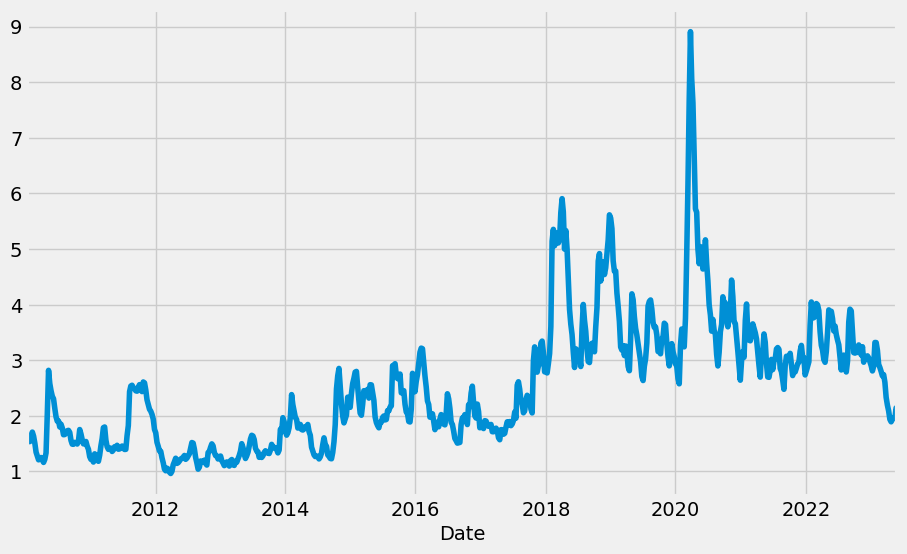

In [18]:
# Plot weekly atr values for MMM
weekly_atr.iloc[0,:].plot()

In [19]:
# Summary statistics
weekly_atr.T.describe()

,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DIS,GS,HD,HON,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,2.527369,2.054388,3.336798,1.316089,4.588926,2.993419,2.285417,0.692684,0.644352,1.969764,4.834159,3.134766,2.215953,2.475031,0.873542,1.684044,1.827873,2.262354,1.090138,2.349957,1.483912,1.412884,3.025330,1.927165,4.229090,0.757934,2.207251,1.243689,1.475318
std,1.145353,1.446850,1.786779,1.432350,3.545207,1.606997,1.039338,0.353252,0.314766,1.268287,2.330246,2.719806,1.486537,0.692945,0.523202,0.917161,1.107149,1.532225,0.531960,2.488664,1.190012,0.834618,2.397761,1.111733,3.798240,0.247777,1.967102,0.454372,0.855209
min,0.964062,0.745060,0.817085,0.127872,0.980574,1.051984,1.015606,0.282318,0.282314,0.536676,1.999113,0.457802,0.650465,1.224560,0.273823,0.512743,0.710623,0.736753,0.397735,0.344658,0.252634,0.573106,0.417264,0.666008,0.677806,0.344658,0.296974,0.502998,0.551768
25%,1.599315,1.067327,1.947985,0.373440,1.880944,1.719035,1.549397,0.415887,0.447223,1.034336,3.103543,1.066073,1.138278,2.024229,0.491731,1.039602,0.990489,1.145309,0.699821,0.647498,0.565687,0.863627,1.297116,1.053513,1.229981,0.607447,0.722225,0.930192,0.880923
50%,2.332942,1.431467,3.180987,0.610695,2.647901,2.347088,1.958759,0.559327,0.558153,1.500373,4.004594,1.942416,1.566605,2.374707,0.678538,1.461722,1.389279,1.650795,0.961280,0.991750,0.992238,1.119002,1.773918,1.520051,2.418090,0.725566,1.246327,1.202799,1.125637
75%,3.159257,2.656292,4.501606,1.724621,7.003339,4.350456,2.655465,0.905460,0.731635,2.698553,5.902561,4.746780,3.206729,2.810964,1.141641,2.298866,2.584669,3.131906,1.374426,3.634369,2.131951,1.803081,4.738363,2.686439,6.448231,0.856455,3.598840,1.482067,1.866293
max,8.908262,8.934803,12.637590,5.885573,22.207869,7.500802,6.760859,2.698481,3.004753,8.119732,13.687535,15.984602,11.339077,6.924274,4.179393,7.151465,8.225360,13.203550,3.929225,10.451312,6.515736,7.099326,12.118897,8.041630,21.137273,2.769390,12.072505,3.650269,6.667592


In [20]:
# Import sklearn modules
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

# Import datetime
from datetime import datetime

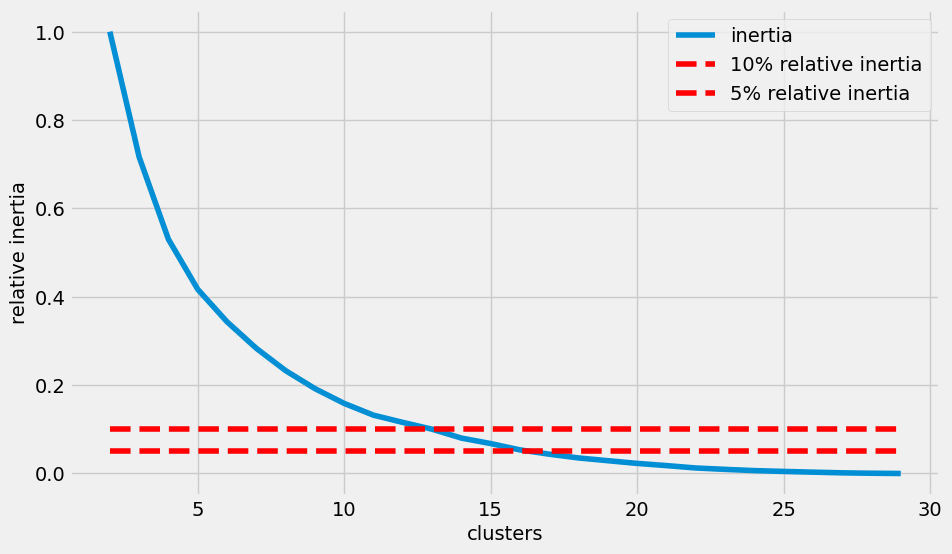

In [21]:
n_clusters = range(2, 30)
inertia = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(weekly_atr)
    inertia.append(kmeans.inertia_)
    
plt.plot(n_clusters, np.divide(inertia, inertia[0]))
plt.hlines(0.1, n_clusters[0], n_clusters[-1], 'r', linestyles='dashed')
plt.hlines(0.05, n_clusters[0], n_clusters[-1], 'r', linestyles='dashed')
plt.xlabel('clusters')
plt.ylabel('relative inertia')
plt.legend(['inertia', '10% relative inertia', '5% relative inertia'])

In [22]:
# Normalize and fit the model
model = Pipeline([('normalizarion', MinMaxScaler()),
                  ('clusters', KMeans(n_clusters=15))])

# Fit the model
model.fit(weekly_atr)

# Assign labels
labels = model.predict(weekly_atr)

# Check labels
labels

array([14, 12,  7, 11,  3, 10,  6,  5,  5, 12,  4,  8, 12,  0,  5,  2,  2,
       12,  5,  1, 11,  2,  8, 12,  9,  5,  1, 13,  2])

In [23]:
# Check average weekly stock returns
weekly_ret.mean(axis=1)

MMM     0.000620
AXP     0.002733
AMGN    0.002442
AAPL    0.005278
BA      0.003338
CAT     0.002622
CVX     0.001620
CSCO    0.001631
KO      0.001427
DIS     0.002047
GS      0.001728
HD      0.003895
HON     0.002785
IBM     0.000528
INTC    0.001248
JNJ     0.001494
JPM     0.002304
MCD     0.002481
MRK     0.001970
MSFT    0.003942
NKE     0.003341
PG      0.001495
CRM     0.004676
TRV     0.002254
UNH     0.004455
VZ      0.000529
V       0.003852
WBA     0.000421
WMT     0.001789
dtype: float64

In [24]:
# Remove DOW from the list
companies = dow_stocks
companies.remove('DOW')

# Remove Dow Inc from the company name
companies_name = dow_company_name
companies_name.remove('Dow')

In [25]:
# Create Data Frame to hold cluster details
df = pd.DataFrame({'Cluster': labels,
                   'Companies Name': companies_name,
                   'Companies': companies,
                   'ATR': weekly_atr.mean(axis=1),
                   'CHG': weekly_ret.mean(axis=1)}).sort_values(by=['Cluster'], axis=0)

df = df.reset_index(drop=True)
df

,Cluster,Companies Name,Companies,ATR,CHG
0,0,IBM,IBM,2.475031,0.000528
1,1,Visa,V,2.207251,0.003852
2,1,Microsoft,MSFT,2.349957,0.003942
3,2,Walmart,WMT,1.475318,0.001789
4,2,Procter & Gamble,PG,1.412884,0.001495
5,2,JPMorgan Chase,JPM,1.827873,0.002304
6,2,Johnson & Johnson,JNJ,1.684044,0.001494
7,3,Boeing,BA,4.588926,0.003338
8,4,Goldman Sachs,GS,4.834159,0.001728
9,5,Verizon,VZ,0.757934,0.000529


Text(0.5, 1.0, 'Dow Stocks ATR Clustring')

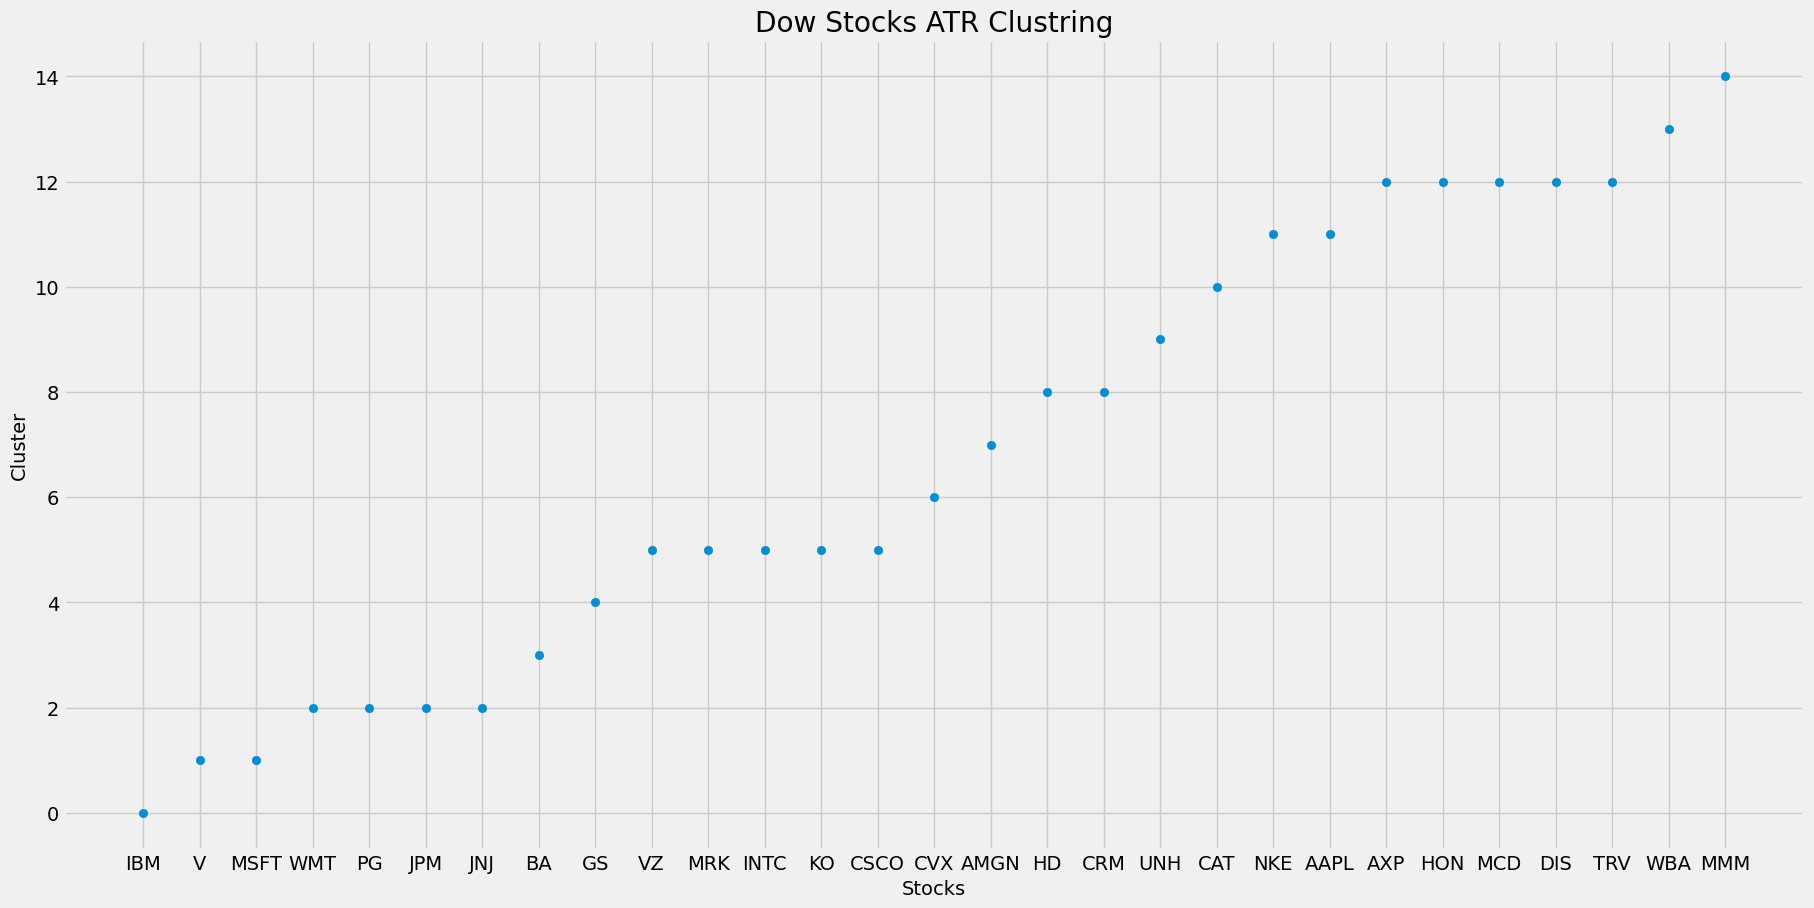

In [26]:
plt.figure(figsize=(20, 10))
plt.scatter(df.Companies, df.Cluster)
plt.xlabel('Stocks')
plt.ylabel('Cluster')
plt.title('Dow Stocks ATR Clustring')

In [27]:
model.get_params()

{'memory': None,
 'steps': [('normalizarion', MinMaxScaler()),
  ('clusters', KMeans(n_clusters=15))],
 'verbose': False,
 'normalizarion': MinMaxScaler(),
 'clusters': KMeans(n_clusters=15),
 'normalizarion__clip': False,
 'normalizarion__copy': True,
 'normalizarion__feature_range': (0, 1),
 'clusters__algorithm': 'lloyd',
 'clusters__copy_x': True,
 'clusters__init': 'k-means++',
 'clusters__max_iter': 300,
 'clusters__n_clusters': 15,
 'clusters__n_init': 'warn',
 'clusters__random_state': None,
 'clusters__tol': 0.0001,
 'clusters__verbose': 0}

In [28]:
# Save locally to be used in SOM
df.to_csv('data/cluster_new.csv')